In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [35]:
df=pd.read_excel('./eordata.xlsx')

df.head(5)

,Number,Country,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,1,USA,40,7100,22,20,153.0,1,Polmer
1,2,USA,33,5250,40,1,135.0,50,Polmer
2,3,USA,16,7900,30,3,150.0,75,Polmer
3,4,USA,550,700,35,6,80.0,64,Polmer
4,5,USA,471,4010,15,75,150.0,62,Polmer


In [36]:
df.drop('Number', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)
df.head(5)

,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,40,7100,22,20,153.0,1,Polmer
1,33,5250,40,1,135.0,50,Polmer
2,16,7900,30,3,150.0,75,Polmer
3,550,700,35,6,80.0,64,Polmer
4,471,4010,15,75,150.0,62,Polmer


In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Observed'] = le.fit_transform(df['Observed'])

In [51]:
df


,"Permeability , md","Depth , ft","Gravity , °API","Viscosity , cp","Temprature , °F",Saturation,Observed
0,40,7100,22,20,153.0,1,4
1,33,5250,40,1,135.0,50,4
2,16,7900,30,3,150.0,75,4
3,550,700,35,6,80.0,64,4
4,471,4010,15,75,150.0,62,4
...,...,...,...,...,...,...,...
458,5500,2560,25,175,NaN,85,6
459,5500,2500,25,175,NaN,84,6
460,3500,475,19,1200,NaN,65,6
461,2000,2100,12,900,NaN,15,6


In [55]:
X = df.to_numpy()


y = X[:, -1]
x = X[:, :-1]

In [39]:
print(df.dtypes)


Permeability , md      int64
Depth , ft             int64
Gravity , °API         int64
Viscosity , cp         int64
Temprature , °F      float64
Saturation             int64
Observed               int64
dtype: object


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [59]:
mean=X_train.mean(axis=0)
std=np.std(X_train, axis=0,dtype='float64')
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

In [61]:
print(X_train.shape)
print(y_train.shape)
print(type(X_train), type(y_train))


(347, 6)
(347,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [65]:
import numpy as np
print(np.isnan(X_train).any())
print(np.isinf(X_train).any())


True
False


In [67]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)


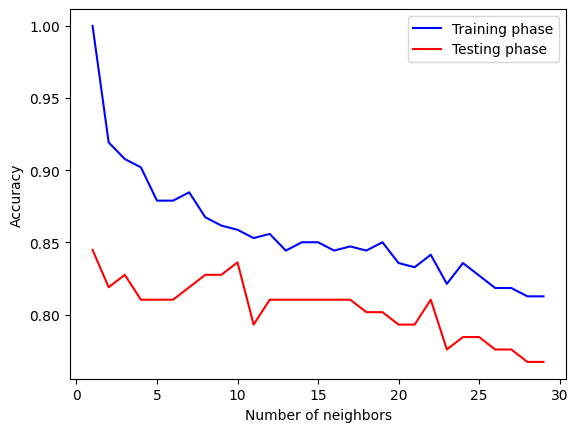

In [69]:
Train_score=[]
Test_score=[]
for i in range(1,30,1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    Train_score.append(clf.score(X_train,y_train))
    Test_score.append(clf.score(X_test,y_test))

    
plt.plot(np.arange(1,30,1), np.array(Train_score), 'b-', label='Training phase')
plt.plot(np.arange(1,30,1), np.array(Test_score), 'r-',label='Testing phase')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()

In [71]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8789625360230547
0.8103448275862069


In [73]:
SIRI=np.array([[0.89, 7050, 29.7, 0.62, 200,54.5]])

### 

In [79]:
SIRI_N=np.nan_to_num((SIRI-mean)/std)

In [81]:
clf.predict(SIRI_N)

array([0.])

In [83]:
h_train=clf.predict(X_train)
h_test=clf.predict(X_test)

In [85]:
confusion_matrix(y_train,h_train)

array([[104,   2,   1,   0,   2,   1,   0,   4],
       [  4,  29,   0,   0,   2,   0,   0,   2],
       [  1,   0,   1,   0,   0,   0,   0,   0],
       [  2,   1,   0,   1,   0,   1,   0,   0],
       [  5,   2,   0,   0,   9,   1,   0,   0],
       [  1,   0,   0,   0,   1, 154,   0,   0],
       [  0,   0,   0,   0,   0,   3,   0,   0],
       [  2,   0,   0,   0,   1,   3,   0,   7]])